In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mesa_reader as mr
from scipy import interpolate

In [4]:
mearth = 5.97e27
msun = 1.9892e33
rearth = 6.371008e8
rsun = 6.9598e10
rfrac = rsun/rearth
mfrac = msun/mearth

In [5]:
def formatstring(myfloat):
    return '%.5f'%myfloat

In [72]:
npzfile = np.load('146c_data.npz',allow_pickle=True)
list(npzfile.keys())

['masses', 'radii', 'fs', 'ages']

In [73]:
masses = npzfile['masses']
radii = npzfile['radii']
fs = npzfile['fs']
ages = npzfile['ages']

In [74]:
final_masses = np.array([masses[i][-1] for i in range(len(masses))])
final_fs = np.array([fs[i][-1] for i in range(len(fs))])
final_radii = np.array([radii[i][-1] for i in range(len(radii))])
final_ages = np.array([ages[i][-1] for i in range(len(ages))])

In [89]:
initial_masses = np.linspace(7.0,8.0,11)
initial_fs = [0.001, 0.002, 0.003] + list(np.arange(0.004, 0.034+0.002, 0.002))
initial_fs = np.array(initial_fs)

In [76]:
grid_fs, grid_ms = np.meshgrid(initial_fs,initial_masses)
grid_fs, grid_ms = grid_fs.flatten(),grid_ms.flatten()
grid_points = np.array([grid_ms,grid_fs]).T

In [77]:
interp_points = np.array([[7.35,7.45,7.62,7.77,7.844234],[grid_fs[0],grid_fs[0],grid_fs[0],grid_fs[0],grid_fs[0]]]).T

In [78]:
print(grid_points.shape,grid_points.dtype)
print(final_radii.shape,final_radii.dtype)
print(interp_points.shape,interp_points.dtype)

(209, 2) float64
(209,) float64
(5, 2) float64


In [79]:
print(len(grid_ms))
print(len(grid_fs))
print(len(final_radii))
print(len(final_ages))

209
209
209
209


In [80]:
interp_rs = interpolate.griddata(grid_points,final_radii,interp_points,method='linear')

print(interp_rs)

[1.85818839 1.86549152 1.86026833 1.867819   1.87668689]


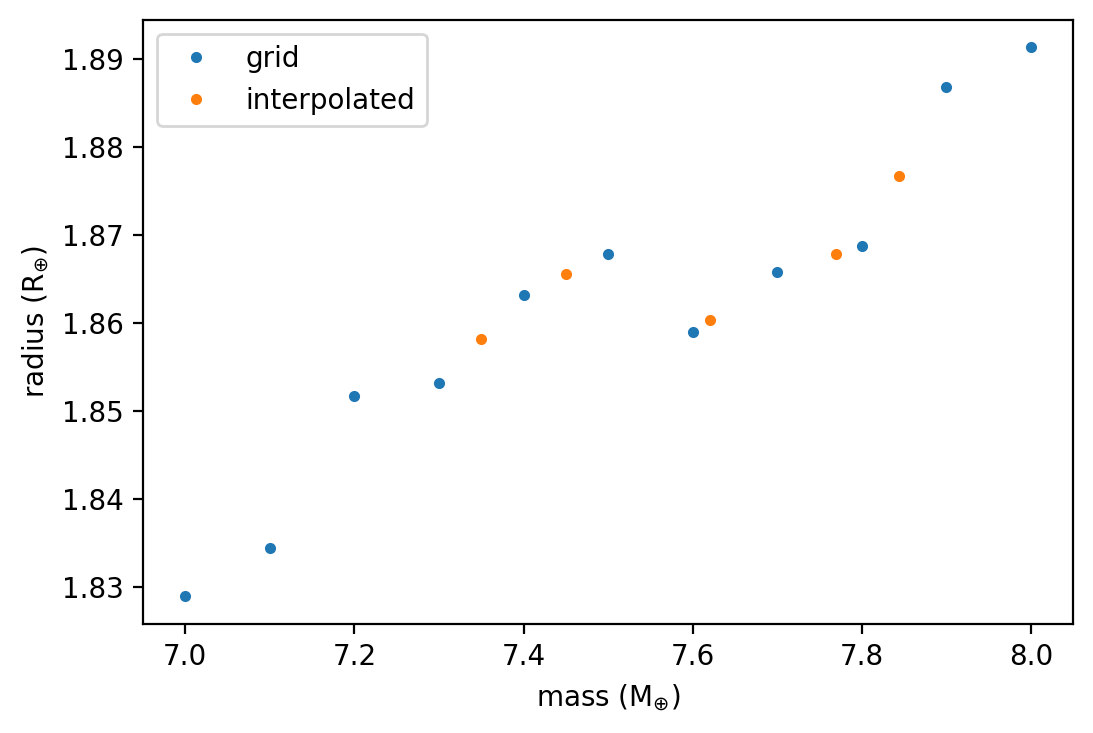

In [81]:
int_ms = [7.35,7.45,7.62,7.77,7.844234]
int_fs = [grid_fs[0],grid_fs[0],grid_fs[0],grid_fs[0],grid_fs[0]]

plt.plot(grid_ms[grid_fs==grid_fs[0]],final_radii[grid_fs==grid_fs[0]],'.',label='grid')
plt.plot(interp_points[:,0],interp_rs,'.',label='interpolated')
#plt.plot(interp_points[:,0], radius_interp(grid_ms,grid_fs,final_radii,int_ms,int_fs),'.')

ax = plt.gca()
ax.set_xlabel('mass (M$_{\oplus}$)')
ax.set_ylabel('radius (R$_{\oplus}$)')
#ax.set_xlim(5.28,6.15)

plt.gcf().set_dpi(200)
plt.legend(loc=0)

In [82]:
def radius_interp(grid_init_m, grid_init_f, grid_radius_values, interp_init_m, interp_init_f):
    #grid_init_f, grid_init_m: initial f_env and mass values fed into MESA
    #radius_values: final radii calculated by MESA
    #interp_init_f, interp_init_m: initial f_env and mass values for which to calculate interpolated R
    #all 1-d lists
    
    grid_pts = np.array([grid_init_m,grid_init_f]).T
    interp_pts = np.array([interp_init_m, interp_init_f]).T
    
    return interpolate.griddata(grid_pts, grid_radius_values, interp_pts, method='linear')

In [83]:
def mass_interp(grid_init_m, grid_init_f, grid_final_m_values, interp_init_m, interp_init_f):
    #grid_init_f, grid_init_m: initial f_env and mass values fed into MESA
    #grid_final_m_values: final masses calculated by MESA
    #interp_init_f, interp_init_m: initial f_env and mass values for which to calculate interpolated R
    #all 1-d lists
    
    grid_pts = np.array([grid_init_m,grid_init_f]).T
    interp_pts = np.array([interp_init_m, interp_init_f]).T  
    print(interp_pts.shape)
    
    return interpolate.griddata(grid_pts, grid_final_m_values, interp_pts, method='linear')

In [84]:
def f_interp(grid_init_m, grid_init_f, grid_final_f_values, interp_init_m, interp_init_f):
    #grid_init_f, grid_init_m: initial f_env and mass values fed into MESA
    #grid_final_m_values: final masses calculated by MESA
    #interp_init_f, interp_init_m: initial f_env and mass values for which to calculate interpolated R
    #all 1-d lists
    
    grid_pts = np.array([grid_init_m,grid_init_f]).T
    interp_pts = np.array([interp_init_m, interp_init_f]).T  
    #print(interp_pts)
    
    return interpolate.griddata(grid_pts, grid_final_f_values, interp_pts, method='linear')

In [85]:
#----------------------------------------------------------------------

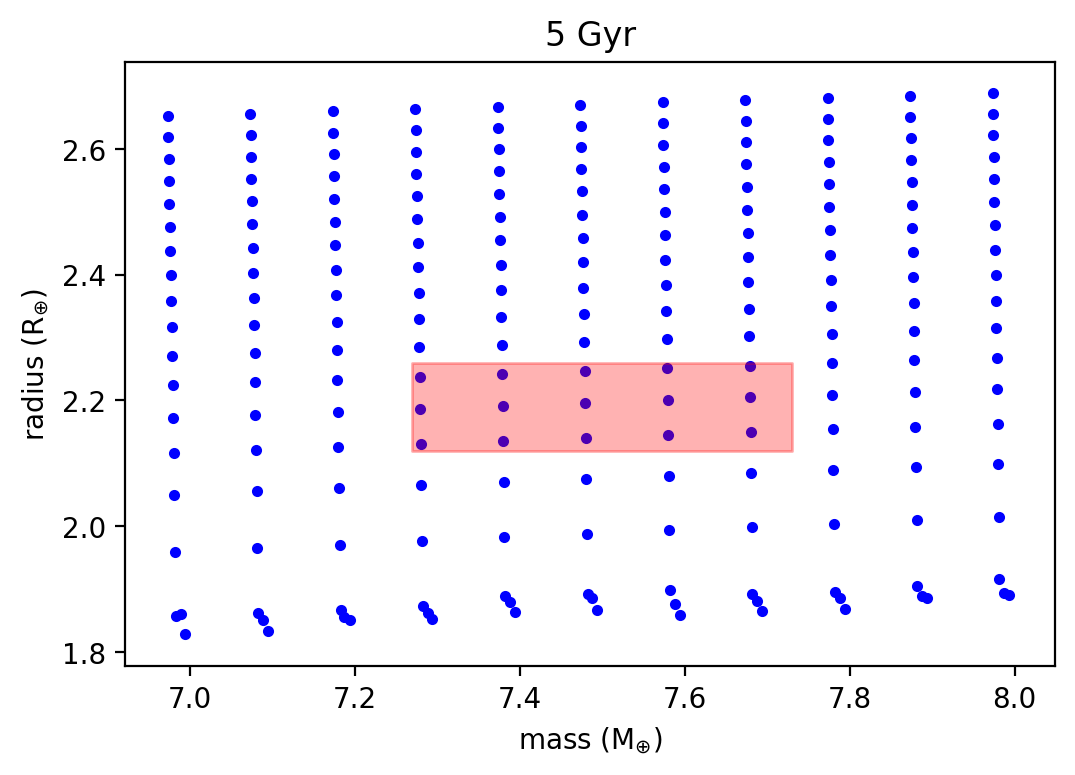

In [86]:
radii_5gyr = []
masses_5gyr = []
newage = 5.0e9

for i in range(0,len(ages)):
    if ages[i][-1] < newage:
        radii_5gyr.append(radii[i][-1])
        masses_5gyr.append(masses[i][-1])
    else:
        radii_age_interp = interpolate.interp1d(ages[i],radii[i],kind='linear')
        radii_5gyr.append(radii_age_interp(5.0e9))
        
        masses_age_interp = interpolate.interp1d(ages[i],masses[i],kind='linear')
        masses_5gyr.append(masses_age_interp(5.0e9))

for i in range(0,len(radii_5gyr)):
    plt.scatter(masses_5gyr[i],radii_5gyr[i],color='b',marker='.')
    #plt.scatter(masses[i][-1],radii[i][-1],color='r',alpha=0.3,marker='.',edgecolors='none')
    
plt.gcf().set_dpi(200)
plt.gca().set_xlabel('mass (M$_{\oplus}$)')
plt.gca().set_ylabel('radius (R$_{\oplus}$)')
plt.title('5 Gyr')

meas_m = 7.50
delta_meas_m = 0.23
meas_r = 2.19
delta_meas_r = 0.07
plt.gca().fill_between([meas_m - delta_meas_m, meas_m + delta_meas_m],meas_r - delta_meas_r,meas_r + delta_meas_r,
                  color='red',alpha=0.3)

In [87]:
#----------------------------------------------------------------------

In [90]:
dense_ms = np.linspace(initial_masses.min(),initial_masses.max(),250)
dense_fs = np.linspace(initial_fs.min(),initial_fs.max(),250)
dense_ms, dense_fs = np.meshgrid(dense_ms, dense_fs)
dense_ms, dense_fs = dense_ms.flatten(), dense_fs.flatten()

intd_masses = mass_interp(grid_ms, grid_fs, masses_5gyr, dense_ms, dense_fs)

intd_radii = radius_interp(grid_ms, grid_fs, radii_5gyr, dense_ms, dense_fs)
                           
#intd_fs = f_interp(grid_ms3, grid_fs3, final_fs3, dense_ms, dense_fs)

(62500, 2)


In [91]:
shapified_masses = intd_masses.reshape(250,250)
#shapified_fs = intd_fs.reshape(250,250)
shapified_radii = intd_radii.reshape(250,-1)

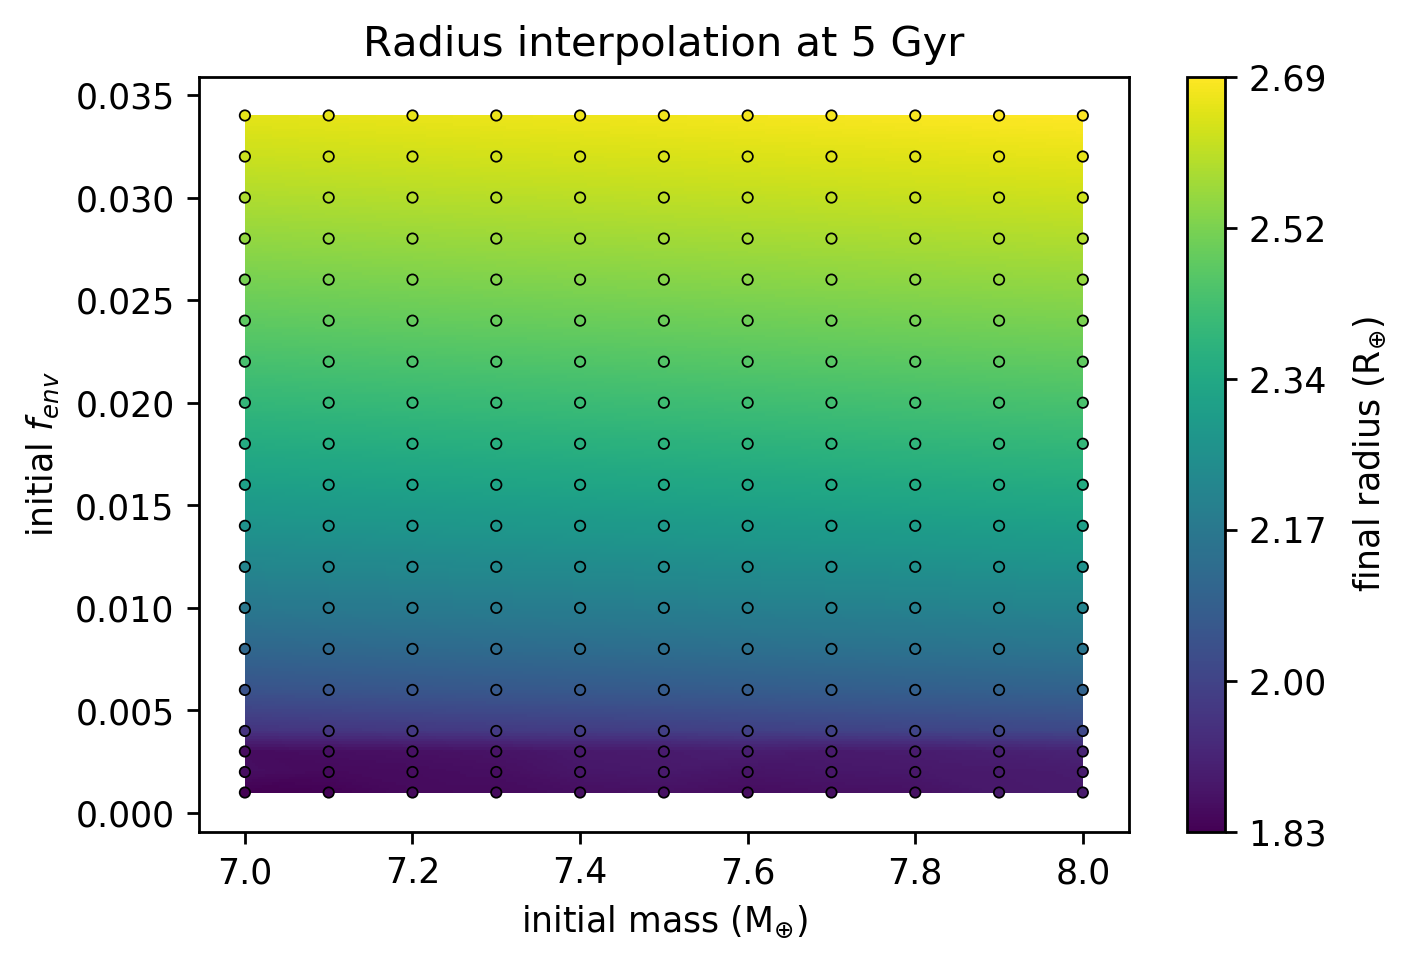

In [92]:
cmap = plt.get_cmap('viridis')

plt.imshow(
shapified_radii,interpolation=None,
    extent = [dense_ms.min(),dense_ms.max(),(dense_fs.min()),(dense_fs.max())],origin='lower',aspect='auto'
)

#plt.plot(5.8,-2,color=plt.get_cmap('viridis')(0.75),marker='.',markeredgewidth=0.5,markeredgecolor='k')

minrad = np.nanmin(radii_5gyr)
maxrad = np.nanmax(radii_5gyr)
radii_5gyr_3 = np.array(radii_5gyr).flatten()
colors = []

for i in range(0,len(radii_5gyr)):
    if radii_5gyr_3[i] != np.nan:
        thiscolor = (radii_5gyr[i] - minrad) / (maxrad - minrad)
        colors.append(cmap(thiscolor))
        
plt.scatter(grid_ms,grid_fs,marker='.',color=colors,lw=0.5,edgecolor='k')

cbar = plt.colorbar()
plt.gcf().set_dpi(250)
plt.gcf().set_facecolor('white')

plt.gca().set_xlabel('initial mass (M$_{\oplus}$)')
plt.gca().set_ylabel('initial $f_{env}$')
plt.title('Radius interpolation at 5 Gyr')
cbar.set_label('final radius (R$_{\oplus}$)')

ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
labels = ticks * (maxrad-minrad) + minrad
labels = ['%.2f '%(label) for label in labels]
cbar.set_ticklabels(labels)